In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN


In [4]:
internet_df = pd.read_csv('../data/internet_use.csv')

In [5]:
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


Drop the `value footnotes` column from both DataFrames. Check that this worked as expected.

In [6]:
gdp_df = gdp_df.drop(columns='Value Footnotes')

In [7]:
internet_df = internet_df.drop(columns= 'Value Footnotes')

 Look at the shape of each DataFrame - how many rows? How many columns? (6870,4)

In [8]:
gdp_df.shape

(6868, 3)

 Look at the shape of each DataFrame - how many rows? How many columns? (4495, 4)

In [9]:
internet_df.shape

(4495, 3)

Take a look at the datatypes for the columns in each DataFrame

In [10]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
dtype: object

In [11]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
dtype: object

Take a look at the last 10 rows of each DataFrame in turn.

In [12]:
gdp_df.tail(10)

,Country or Area,Year,Value
6858,Zimbabwe,1999,3600.849291
6859,Zimbabwe,1998,3653.920016
6860,Zimbabwe,1997,3580.048793
6861,Zimbabwe,1996,3520.430146
6862,Zimbabwe,1995,3226.413930
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094
6867,Zimbabwe,1990,3324.348171


In [13]:
internet_df.tail(10)

,Country or Area,Year,Value
4485,Zimbabwe,2002,3.994356
4486,Zimbabwe,2001,0.799846
4487,Zimbabwe,2000,0.401434
4488,Zimbabwe,1999,0.161676
4489,Zimbabwe,1998,0.081648
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739
4494,Zimbabwe,1990,0.000000


Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’

In [14]:
gdp_df = gdp_df.rename( columns = {'Country or Area': 'Country', 'Value' : 'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [15]:
internet_df = internet_df.rename( columns = {'Country or Area' : 'Country', 'Value' : 'Internet_Users_Pct'})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


Merge the two DataFrames to one. Merge **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`

In [16]:
gdp_internet_use = pd.merge(gdp_df, internet_df, how= 'left', on=[ 'Country', 'Year'])
gdp_internet_use

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
...,...,...,...,...
6863,Zimbabwe,1994,3263.934978,0.001739
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN


Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [17]:
gdp_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


Look at the last five rows to make sure the data is clean and as expected.

In [18]:
gdp_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6863,Zimbabwe,1994,3263.934978,0.001739
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,0.000000


Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [19]:
year_040914 = gdp_internet_use[(gdp_internet_use['Year'] == 2004) | (gdp_internet_use['Year'] == 2009) | (gdp_internet_use['Year'] == 2014)]
year_040914.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000


Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long

In [20]:
gdp_internet_04 = gdp_internet_use[gdp_internet_use['Year']== 2004]
gdp_internet_04.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
15,Afghanistan,2004,1200.278256,0.105809
33,Albania,2004,7604.838002,2.420388
63,Algeria,2004,10058.435939,4.634475
93,Angola,2004,5593.241537,0.464815
123,Antigua and Barbuda,2004,18745.681534,24.266544


In [21]:
gdp_internet_09 = gdp_internet_use[gdp_internet_use['Year']== 2009]
gdp_internet_09.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10,Afghanistan,2009,1758.904043,3.55
28,Albania,2009,10346.864199,41.20
58,Algeria,2009,10782.361398,11.23
88,Angola,2009,7643.493749,6.00
118,Antigua and Barbuda,2009,20046.839017,42.00


In [22]:
gdp_internet_14 = gdp_internet_use[gdp_internet_use['Year']==2014]
gdp_internet_14.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.39
23,Albania,2014,11623.866679,60.10
53,Algeria,2014,11512.705405,18.09
83,Angola,2014,8239.828837,21.26
113,Antigua and Barbuda,2014,18104.241470,64.00


Which country had the highest percentage of internet users in 2014? What was the percentage? Iceland 98.16

In [23]:
sorted_14 = gdp_internet_14.sort_values(by="Internet_Users_Pct", ascending=False)
print(sorted_14)

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
2625                   Iceland  2014    49652.149500               98.16
561                    Bermuda  2014    77361.104881               96.80
4648                    Norway  2014    62589.373548               96.30
1452                   Denmark  2014    52214.537753               95.99
3691                Luxembourg  2014   108760.916030               94.67
...                        ...   ...             ...                 ...
6418  Turks and Caicos Islands  2014    24393.400501                 NaN
6427                    Tuvalu  2014     3450.793169                 NaN
6607       Upper middle income  2014    14275.343977                 NaN
6757        West Bank and Gaza  2014     5967.073437                 NaN
6783                     World  2014    15189.648507                 NaN

[238 rows x 4 columns]


Which country had the lowest percentage of internet users in 2014? What was the percentage? Timor-Leste 1.14

In [24]:
sorted_14_descending = gdp_internet_14.sort_values(by="Internet_Users_Pct", ascending=True)
print(sorted_14_descending)


                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
6219               Timor-Leste  2014     3264.568070                1.14
827                    Burundi  2014      886.235777                1.38
2326                    Guinea  2014     2061.760973                1.72
4528                     Niger  2014     1127.615541                1.95
5434              Sierra Leone  2014     1997.511853                2.10
...                        ...   ...             ...                 ...
6418  Turks and Caicos Islands  2014    24393.400501                 NaN
6427                    Tuvalu  2014     3450.793169                 NaN
6607       Upper middle income  2014    14275.343977                 NaN
6757        West Bank and Gaza  2014     5967.073437                 NaN
6783                     World  2014    15189.648507                 NaN

[238 rows x 4 columns]


Repeat for 2004 and 2009.

Sweden 83.39 (2004)

In [25]:
sorted_04 = gdp_internet_04.sort_values( by="Internet_Users_Pct", ascending=False)
print(sorted_04)

                  Country  Year  GDP_Per_Capita  Internet_Users_Pct
6019               Sweden  2004    44496.023401               83.89
2635              Iceland  2004    45145.545658               83.88
1462              Denmark  2004    50607.628971               80.93
4658               Norway  2004    60893.410993               77.69
2066              Finland  2004    43760.279146               72.39
...                   ...   ...             ...                 ...
6229          Timor-Leste  2004     2258.608056                 NaN
6437               Tuvalu  2004     3336.952920                 NaN
6617  Upper middle income  2004     8567.061394                 NaN
6767   West Bank and Gaza  2004     4485.525458                 NaN
6793                World  2004    12077.823821                 NaN

[234 rows x 4 columns]


Myanmar .024 (2004)

In [26]:
sorted_04_descending = gdp_internet_04.sort_values( by= "Internet_Users_Pct", ascending = True)
print(sorted_04_descending)

                  Country  Year  GDP_Per_Capita  Internet_Users_Pct
4342              Myanmar  2004     1696.881760            0.024337
3545              Liberia  2004     1181.546158            0.031011
6079           Tajikistan  2004     1737.743630            0.077480
15            Afghanistan  2004     1200.278256            0.105809
1856             Ethiopia  2004      793.093786            0.155335
...                   ...   ...             ...                 ...
6229          Timor-Leste  2004     2258.608056                 NaN
6437               Tuvalu  2004     3336.952920                 NaN
6617  Upper middle income  2004     8567.061394                 NaN
6767   West Bank and Gaza  2004     4485.525458                 NaN
6793                World  2004    12077.823821                 NaN

[234 rows x 4 columns]


Iceland 93.00 (2009)

In [27]:
sorted_09 = gdp_internet_09.sort_values( by= "Internet_Users_Pct", ascending = False)
print(sorted_09)

                  Country  Year  GDP_Per_Capita  Internet_Users_Pct
2630              Iceland  2009    48177.084123               93.00
4653               Norway  2009    61886.564498               92.08
6014               Sweden  2009    45638.035577               91.00
4443          Netherlands  2009    51772.424928               89.63
3696           Luxembourg  2009   104932.811953               87.31
...                   ...   ...             ...                 ...
6164          The Bahamas  2009    36499.650039                 NaN
6194           The Gambia  2009     2283.183556                 NaN
6612  Upper middle income  2009    11212.934078                 NaN
6762   West Bank and Gaza  2009     5250.116075                 NaN
6788                World  2009    13396.524163                 NaN

[236 rows x 4 columns]


Timor-Leste 0.185 (2009)

In [28]:
sorted_09_descending = gdp_internet_09.sort_values( by = "Internet_Users_Pct", ascending = True)
print(sorted_09_descending)

                  Country  Year  GDP_Per_Capita  Internet_Users_Pct
6224          Timor-Leste  2009     2724.770973            0.185252
4337              Myanmar  2009     2874.780227            0.220000
5439         Sierra Leone  2009     1372.392285            0.260000
922              Cambodia  2009     2603.583778            0.530000
1851             Ethiopia  2009     1150.206179            0.540000
...                   ...   ...             ...                 ...
6164          The Bahamas  2009    36499.650039                 NaN
6194           The Gambia  2009     2283.183556                 NaN
6612  Upper middle income  2009    11212.934078                 NaN
6762   West Bank and Gaza  2009     5250.116075                 NaN
6788                World  2009    13396.524163                 NaN

[236 rows x 4 columns]


Which country had the highest gdp per capita in 2014? What was the gdp per capita? Macao SAR, China 156514.13

In [29]:
highest_gdp_14 = gdp_internet_14.sort_values(by= "GDP_Per_Capita", ascending = False)
print(highest_gdp_14)

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
3721          Macao SAR, China  2014   156514.133850                 NaN
3691                Luxembourg  2014   108760.916030               94.67
5138                     Qatar  2014    95578.416973               91.49
5464                 Singapore  2014    87808.663157               82.00
561                    Bermuda  2014    77361.104881               96.80
...                        ...   ...             ...                 ...
4528                     Niger  2014     1127.615541                1.95
1422           Dem. Rep. Congo  2014     1029.790785                 NaN
3781                    Malawi  2014     1027.208496                5.83
827                    Burundi  2014      886.235777                1.38
1047  Central African Republic  2014      822.610458                 NaN

[238 rows x 4 columns]


	Which country had the lowest gdp per capita in 2014? What was the gdp per capita? Central African Republic 822.61

In [30]:
lowest_gdp_14 = gdp_internet_14.sort_values( by= "GDP_Per_Capita", ascending = True)
print(lowest_gdp_14)

                       Country  Year  GDP_Per_Capita  Internet_Users_Pct
1047  Central African Republic  2014      822.610458                 NaN
827                    Burundi  2014      886.235777                1.38
3781                    Malawi  2014     1027.208496                5.83
1422           Dem. Rep. Congo  2014     1029.790785                 NaN
4528                     Niger  2014     1127.615541                1.95
...                        ...   ...             ...                 ...
561                    Bermuda  2014    77361.104881               96.80
5464                 Singapore  2014    87808.663157               82.00
5138                     Qatar  2014    95578.416973               91.49
3691                Luxembourg  2014   108760.916030               94.67
3721          Macao SAR, China  2014   156514.133850                 NaN

[238 rows x 4 columns]


2004 Percent Using the Internet vs GDP Per Capita  scatterplot

Text(0, 0.5, 'GDP per Capita')

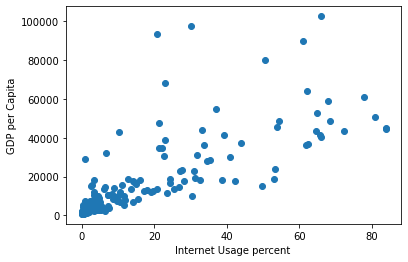

In [32]:
plt.scatter( x = 'Internet_Users_Pct', y = 'GDP_Per_Capita', data = gdp_internet_04)
plt.xlabel ('Internet Usage percent ')
plt.ylabel ('GDP per Capita')


2009 Percent Using the Internet vs GDP Per Capita  scatterplot

Text(0, 0.5, 'GDP per Capita')

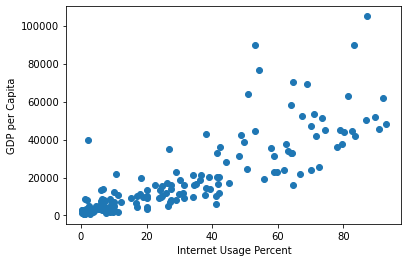

In [33]:
plt.scatter( x= 'Internet_Users_Pct', y= 'GDP_Per_Capita', data = gdp_internet_09)
plt.xlabel ('Internet Usage Percent')
plt.ylabel ('GDP per Capita')


2014 Percent Using the Internet vs GDP Per Capita 

Text(0, 0.5, 'GDP per Capita')

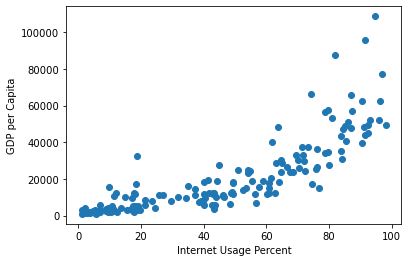

In [34]:
plt.scatter(x= 'Internet_Users_Pct', y='GDP_Per_Capita', data = gdp_internet_14)
plt.xlabel ('Internet Usage Percent')
plt.ylabel ('GDP per Capita')


Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

Look at the distribution of gdp per capita values for 2014. Is it unimodal?

Text(0, 0.5, 'GDP per Capita')

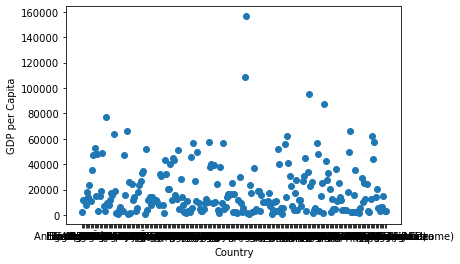

In [37]:
plt.scatter( x= 'Country', y= 'GDP_Per_Capita', data= gdp_internet_14)
plt.xlabel ('Country')
plt.ylabel ('GDP per Capita')

Look at the distribution of Internet Use for 2014. Is it unimodal?

Text(0, 0.5, 'GDP per Capita')

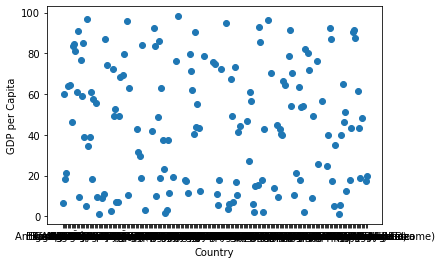

In [41]:
plt.scatter( x= 'Country', y= 'Internet_Users_Pct', data= gdp_internet_14)
plt.xlabel ('Country')
plt.ylabel ('GDP per Capita')

	What are the top 5 countries in terms of internet use in 2014

In [45]:
top_5_internet_14 = gdp_internet_14.sort_values(by = 'Internet_Users_Pct', ascending= False)[:5]
print(top_5_internet_14)

         Country  Year  GDP_Per_Capita  Internet_Users_Pct
2625     Iceland  2014    49652.149500               98.16
561      Bermuda  2014    77361.104881               96.80
4648      Norway  2014    62589.373548               96.30
1452     Denmark  2014    52214.537753               95.99
3691  Luxembourg  2014   108760.916030               94.67


Create a DataFrame called top_5_internet **from the combined DataFrame that has all three years _for the 5 countries that had the greatest 2014 internet usage_**. You should have 15 rows. Check that this is true.

In [46]:
top_5_internet_09 = gdp_internet_09.sort_values(by = 'Internet_Users_Pct', ascending= False)[:5]
print(top_5_internet_09)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
2630      Iceland  2009    48177.084123               93.00
4653       Norway  2009    61886.564498               92.08
6014       Sweden  2009    45638.035577               91.00
4443  Netherlands  2009    51772.424928               89.63
3696   Luxembourg  2009   104932.811953               87.31


In [47]:
top_5_internet_04 = gdp_internet_04.sort_values(by = 'Internet_Users_Pct', ascending= False)[:5]
print(top_5_internet_04)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
6019   Sweden  2004    44496.023401               83.89
2635  Iceland  2004    45145.545658               83.88
1462  Denmark  2004    50607.628971               80.93
4658   Norway  2004    60893.410993               77.69
2066  Finland  2004    43760.279146               72.39


In [49]:
top_5_internet = pd.concat([top_5_internet_04,top_5_internet_09,top_5_internet_14])
print(top_5_internet)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
6019       Sweden  2004    44496.023401               83.89
2635      Iceland  2004    45145.545658               83.88
1462      Denmark  2004    50607.628971               80.93
4658       Norway  2004    60893.410993               77.69
2066      Finland  2004    43760.279146               72.39
2630      Iceland  2009    48177.084123               93.00
4653       Norway  2009    61886.564498               92.08
6014       Sweden  2009    45638.035577               91.00
4443  Netherlands  2009    51772.424928               89.63
3696   Luxembourg  2009   104932.811953               87.31
2625      Iceland  2014    49652.149500               98.16
561       Bermuda  2014    77361.104881               96.80
4648       Norway  2014    62589.373548               96.30
1452      Denmark  2014    52214.537753               95.99
3691   Luxembourg  2014   108760.916030               94.67


Create a seaborn FacetGrid to show the internet usage trend across the years 2004, 2009, and 2014 for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?

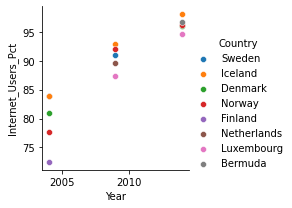

In [58]:
f = sns.FacetGrid(top_5_internet, hue='Country')
f.map(sns.scatterplot, 'Year', 'Internet_Users_Pct')
f.add_legend()


Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use? Timor-Leste

In [59]:
bottom_5_internet_04 = gdp_internet_04.sort_values(by = 'Internet_Users_Pct', ascending=True)[:5]
print(bottom_5_internet_04)

          Country  Year  GDP_Per_Capita  Internet_Users_Pct
4342      Myanmar  2004     1696.881760            0.024337
3545      Liberia  2004     1181.546158            0.031011
6079   Tajikistan  2004     1737.743630            0.077480
15    Afghanistan  2004     1200.278256            0.105809
1856     Ethiopia  2004      793.093786            0.155335


In [65]:
bottom_5_internet_09 = gdp_internet_09.sort_values(by = 'Internet_Users_Pct', ascending=True)[:5]
print(bottom_5_internet_09)

           Country  Year  GDP_Per_Capita  Internet_Users_Pct
6224   Timor-Leste  2009     2724.770973            0.185252
4337       Myanmar  2009     2874.780227            0.220000
5439  Sierra Leone  2009     1372.392285            0.260000
922       Cambodia  2009     2603.583778            0.530000
1851      Ethiopia  2009     1150.206179            0.540000


In [66]:
bottom_5_internet_14 = gdp_internet_14.sort_values(by = 'Internet_Users_Pct', ascending=True)[:5]
print(bottom_5_internet_14)

           Country  Year  GDP_Per_Capita  Internet_Users_Pct
6219   Timor-Leste  2014     3264.568070                1.14
827        Burundi  2014      886.235777                1.38
2326        Guinea  2014     2061.760973                1.72
4528         Niger  2014     1127.615541                1.95
5434  Sierra Leone  2014     1997.511853                2.10


In [67]:
bottom_5_internet = pd.concat([bottom_5_internet_04,bottom_5_internet_09,bottom_5_internet_14])
print(bottom_5_internet)

           Country  Year  GDP_Per_Capita  Internet_Users_Pct
4342       Myanmar  2004     1696.881760            0.024337
3545       Liberia  2004     1181.546158            0.031011
6079    Tajikistan  2004     1737.743630            0.077480
15     Afghanistan  2004     1200.278256            0.105809
1856      Ethiopia  2004      793.093786            0.155335
6224   Timor-Leste  2009     2724.770973            0.185252
4337       Myanmar  2009     2874.780227            0.220000
5439  Sierra Leone  2009     1372.392285            0.260000
922       Cambodia  2009     2603.583778            0.530000
1851      Ethiopia  2009     1150.206179            0.540000
6219   Timor-Leste  2014     3264.568070            1.140000
827        Burundi  2014      886.235777            1.380000
2326        Guinea  2014     2061.760973            1.720000
4528         Niger  2014     1127.615541            1.950000
5434  Sierra Leone  2014     1997.511853            2.100000


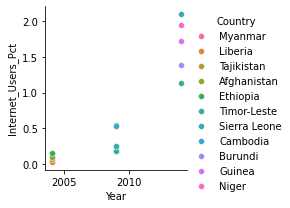

In [69]:
h = sns.FacetGrid(bottom_5_internet, hue='Country')
h.map(sns.scatterplot, 'Year', 'Internet_Users_Pct')
h.add_legend()

Find the top 5 countries for 2014 in terms of GDP per capita; create a DataFrame to look at 10-year trends (use 2004, 2009, 2014 to look at the 10-year trend) in gdp per capita for the 5 countries with the highest 2014 GDP per capita. Use a seaborn facet grid for this.

In [70]:
top_5_gdp_14 = gdp_internet_14.sort_values ( by= 'GDP_Per_Capita', ascending= False)[:5]
print(top_5_gdp_14)

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
3721  Macao SAR, China  2014   156514.133850                 NaN
3691        Luxembourg  2014   108760.916030               94.67
5138             Qatar  2014    95578.416973               91.49
5464         Singapore  2014    87808.663157               82.00
561            Bermuda  2014    77361.104881               96.80
